In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy
import control

## Creating model system


     3e-09 s + 30
----------------------
s^3 + 6 s^2 + 5 s + 30

feedback info
-------------
RiseTime: 0.5058786385507097
Overshoot: 93.70305071110504


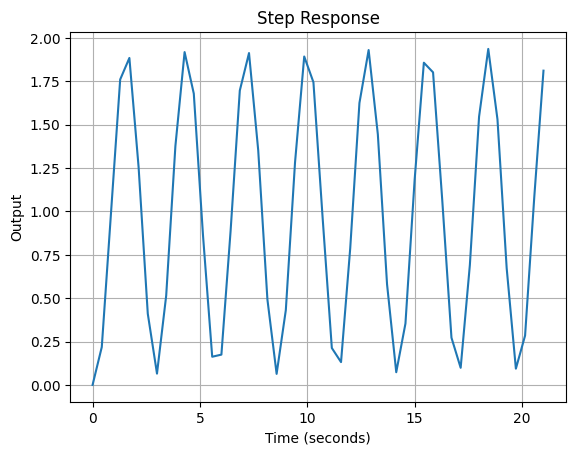

In [24]:
s = control.TransferFunction.s

system = 1/(s*(s+1)*(s+5))

Kp = 30
Ti = 10000000000
Td = 0
pid = Kp*(1 + 1/Ti*s + Td*s)

feedback = control.feedback(system*pid)
print(feedback)

# step response
dt = 0.01
t = np.linspace(0,21)
T, y = control.step_response(feedback, t)

info = control.step_info(feedback)
print("feedback info")
print("-------------")
print("RiseTime:",info["RiseTime"])
print("Overshoot:", info["Overshoot"])

# plot
plt.plot(T, y)
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid()
plt.show()

In [22]:
#Routh criteria
sympy.init_printing()

s = sympy.Symbol('s')

a_0, a_1, a_2, a_3 = sympy.symbols('a_0:4')
p = a_0 + a_1*s**1 + a_2*s**2 + a_3*s**3

p = sympy.Poly(p, s)
p

In [6]:
# definicion de criterio extraido de https://github.com/alchemyst/Dynamics-and-Control/blob/master/tbcontrol/symbolic.py
def routh(p):
    """ Construct the Routh-Hurwitz array given a polynomial in s

    Input: p - a sympy.Poly object
    Output: The Routh-Hurwitz array as a sympy.Matrix object
    """
    coefficients = p.all_coeffs()
    N = len(coefficients)
    M = sympy.zeros(N, (N+1)//2 + 1)

    r1 = coefficients[0::2]
    r2 = coefficients[1::2]
    M[0, :len(r1)] = [r1]
    M[1, :len(r2)] = [r2]
    for i in range(2, N):
        for j in range(N//2):
            S = M[[i-2, i-1], [0, j+1]]
            M[i, j] = sympy.simplify(-S.det()/M[i-1,0])
    return M[:, :-1]

In [24]:
routh(p)

⎡     a₃       a₁⎤
⎢                ⎥
⎢     a₂       a₀⎥
⎢                ⎥
⎢  a₀⋅a₃         ⎥
⎢- ───── + a₁  0 ⎥
⎢    a₂          ⎥
⎢                ⎥
⎣     a₀       0 ⎦

In [8]:
#aplicando criterio
Kp = sympy.Symbol('Kp')
s = sympy.Symbol('s')

ce = s**3 + 6*s**2 + 5*s + Kp #charateristic equation

A = routh(sympy.Poly(ce,s))
A

Matrix([
[       1,  5],
[       6, Kp],
[5 - Kp/6,  0],
[      Kp,  0]])

In [30]:
# limites de estabilidad
sympy.solve([e > 0 for e in A[:,0]], Kp)

In [43]:
# obteniendo ti y td
s = sympy.Symbol('s')
jw = sympy.Symbol('jw')
ce = s**3 + 6*s**2 + 5*s + 30

roots = sympy.solve(ce,s)
roots
# replaced_poly = ce.subs(s, jw)
# simplify = sympy.solve(replaced_poly,jw)
# simplify




In [50]:
# calculando Kp Ti Td
w = np.sqrt(5)
Pcr = (2*np.pi)/w


Kcr = 30
Kp = 0.6*Kcr
Ti = 0.5*Pcr
Td = 0.125*Pcr

print(Kp,Ti,Td)

18.0 1.4049629462081452 0.3512407365520363


## Creating the PID controller


            8.877 s^2 + 25.29 s + 18
------------------------------------------------
12.47 s^4 + 74.83 s^3 + 71.24 s^2 + 25.29 s + 18



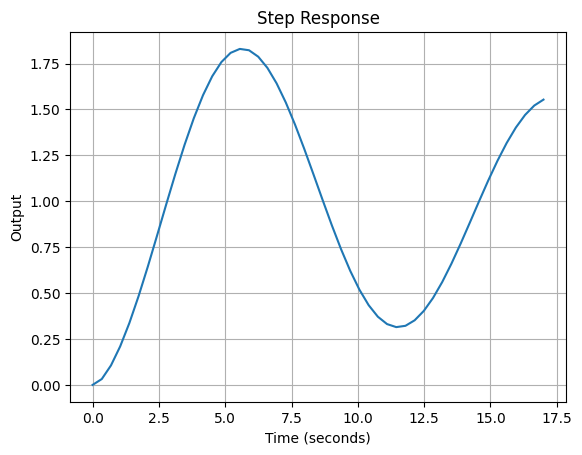

In [25]:
s = control.TransferFunction.s

system = (1/(s*(s+1)*(s+5)))

Kp = 18
Ti = 1.405
Td = 0.351
pid = (Kp*(1 + 1/(Ti*s) + Td*s))

feedback = control.feedback(system*pid)
print(feedback)

t = np.linspace(0,17)
T, y = control.step_response(feedback, t)

# plot
plt.plot(T, y)
plt.xlabel('Time (seconds)')
plt.ylabel('Output')
plt.title('Step Response')
plt.grid()
plt.show()

In [53]:
s = sympy.Symbol('s')
Kp = sympy.Symbol('Kp')
Ti = sympy.Symbol('Ti')
Td = sympy.Symbol('Td')
pid = 18*(1 + 1/(1.405*s) + 0.35124*s)

a = sympy.factor(pid)
a


18.0*(0.35124*s**2 + 1.0*s + 0.711743772241993)/s

# comparacion

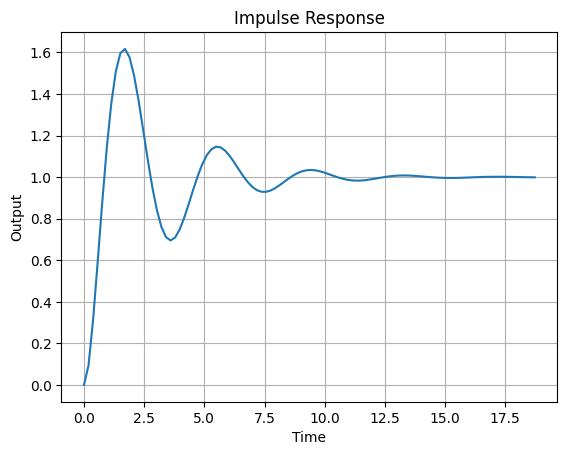

In [13]:
# result

# Define the transfer function
num = [6.3223, 18, 12.811]
den = [1, 6, 11.3223, 18, 12.811]

sys = signal.lti(num, den)

# Compute the impulse response
t, y = signal.step(sys)

# Plot the impulse response
plt.plot(t, y)
plt.xlabel('Time')
plt.grid()
plt.ylabel('Output')
plt.title('Impulse Response')
plt.show()
